<a href="https://colab.research.google.com/github/grc-04/Best-websites-a-programmer-should-visit/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the Google Drive to import the CSV File

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Machine Learning Libraries required in Preprocessing, Feature Engineering and Classification of data

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [6]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [7]:
data=pd.read_csv('housing.csv')

In [ ]:
data.info()

In [ ]:
#As there are some null entries, we drop the rows having null values 

In [9]:
data.dropna(inplace=True)

In [ ]:
#Splitting the data into Train 

In [10]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [12]:
train_data=x_train.join(y_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc90580c820>,
      dtype=object)

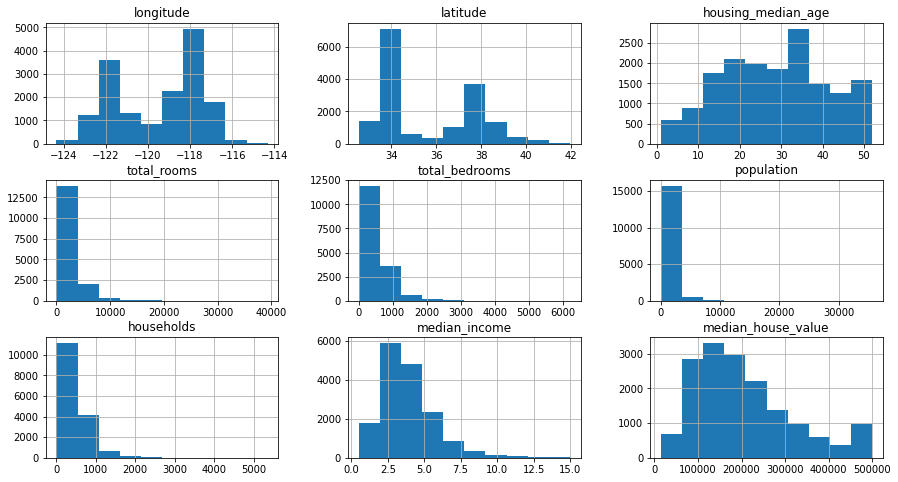

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)


In [ ]:
train_data.ocean_proximity.value_counts()

In [16]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [ ]:
from seaborn import heatmap
from matplotlib import figure
plt.figure.Figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
plt.figure.Figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [19]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()

x_train, y_train= train_data.drop(['median_house_value'],axis=1) ,train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [23]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [24]:
x_test, y_test= test_data.drop(['median_house_value'],axis=1) ,test_data['median_house_value']


In [30]:
x_test_s=scaler.transform(x_test)

In [ ]:
reg.score(x_test_s,y_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor


forest=RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [36]:
forest.score(x_test_s,y_test)

0.8183580121408415

In [38]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid={
    "n_estimators" : [3,10,30],
    "max_features" : [2,4,6,8],
    }

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid={
    "n_estimators" : [100,200,300],
    "max_features" : [2,4],
    "max_depth"    : [None,4,8]
    }

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
best_forest=grid_search.best_estimator_

In [45]:
best_forest.score(x_test_s,y_test)

0.8149265380744317